## Final Project Submission

Please fill out:
* Student name: Ryan Beck
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


**Project Objective:** Clean, explore, and model this the Kings County Data Set with a multivariate linear regression to predict the sale price of houses as accurately as possible.

Project Outline/Workplan:
1. Determine Research Questions
2. Import Data and Format
    * Set up environment
    * Import data as dataframe
    * Learn basic shape and features of data
3. Data Cleaning
    * Identify and deal with duplicates
    * Identify and deal with missing data
    * Identify and deal with inconsitent data
4. Data Exploration
    * Create initial visualizations to better understand data
        * Histograms - Scatter plots - Box plots
        *  Deal with categorical variables: dummies, bin, or drop
5. Feature Engineering
    * Select important features and construct more meaningful ones from raw data
        * Check for multicolinearity
        * Normalize and scale features where necessary
6. Develop Model
    * Fit model
7. Vizualize and Present Findings

## Research Questions 

1. Given available data, to what degree of confidence can we predict housing prices? 
2. What factors contribute to predicted housing price most significantly? 

## Our Data

In [1]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Read the King's County dataframe with Pandas and assign it to the variable df
df = pd.read_csv('kc_house_data.csv')
# Make sure everytingh has been imported correctly and get a first look at the top five rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Print a summary of the dataframe and make initial observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


**Initial Observations:** 
* The dataframe is 21 columns wide and has 21,597 entries 
* 'waterfront', 'yr_renovated', and 'view' appear to be missing values
* 'sqft_basement' is oddly coded as an object
* 'date' is also an object - I'm not sure if this is normal and will look further into it when cleaning the data

## Data Cleaning

### Duplicate Entries

As a first step to cleaning the data we'll check to see how may duplicate entries may exist. This is a good first step because it may reduce the total number of entries that may need to be cleaned, which implies that dropping may be easier for columns with low numbers of missing or inconsistent values.

In [3]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


Great! There are no rows that are completely dublicated. But there may still be duplicate values to know about, so let's check to see if 'id' has any duplicates. 

In [4]:
# Select duplicate values of 'id' except first occurrence 
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


This is interesting, but not necessarily a problem. It may mean that homes with the same 'id' have been sold multiple times, since the 'id' is duplicated, but entire rows are not. Additionally, as 'id' could be an index, but likely not a predictor that will be used later in our model, we can keep these duplicate values in for now and keep an eye on them later if they do present problems.

### Missing data

Next, we can look at the three columns of data we noticed earlier had missing values: 'waterfront', 'yr_renovated', and 'view'. First, let's get a count of how many missing values there are in the data set and make sure we didn't miss any earlier

In [5]:
#Count the number of missing values for all columns in the data and return the name
# and count of those that do
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


It looks like these are the only three with missing values. Let's get an idea of what percentage of the data the missing values represent.

In [6]:
for v in (['waterfront', 'view', 'yr_renovated']):
    print(f'{v} is missing {round(df[v].isna().sum()/len(df)*100,3)}% of its values')

waterfront is missing 11.002% of its values
view is missing 0.292% of its values
yr_renovated is missing 17.79% of its values


Lets explore each of these one-by-one, starting with 'view'. 

'view' is only missing values for .29% of all entries, which means we can likely drop those rows without losing much fidelity in our data. Let's take a deeper look at 'view' to learn more about it first. 

In [7]:
#check the total number of unique values of 'view'
display(df.view.nunique())
df.view.unique()

5

array([ 0., nan,  3.,  4.,  2.,  1.])

There are only 5 unique values of 'view' which means it is a categorical variable. Let's see how those values are distributed.

In [8]:
df.view.value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

With the value 0.0 accounting ~90% of values for 'view' we are presented with a choice. We could reassign the 63 missing values to 0.0 and likely be safe, or just drop the rows, as they represent less than a half of a percent of the overall data. In this case we'll drop the rows. 

In [9]:
# drop all rows that have a null value for 'view' and check to see how it has changed our data
df.dropna(axis=0, subset=['view'], inplace=True)
print(f'Are there any null values: {df.view.isna().any()}\n')
df.info()

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


We have successffully dropped the 63 entries with null values for 'view', next we will assess 'waterfront'.

We know from our analysis above that there are 2376 missing values for 'waterfront', which represents ~11% of total values. This is a more significant portion of the data, so we do not want to drop it. Our alternatives are to impute the missing data, or to label it 'missing'. Let's learn more about the characteristics of 'waterfront' to decide.

In [10]:
#check the total number of unique values of 'waterfront'
display(df.waterfront.nunique())
df.waterfront.unique()

2

array([nan,  0.,  1.])

It appears that 'waterfront' is also categorical data, and further, it is binary, which may lead to easy imputing based on the distribution of values.

In [11]:
# check to see how the values for 'waterfront' are distributed.
df.waterfront.value_counts(normalize=True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

Over 99% of values for water front are 0. We now have another option, we can just assign the missing values to 0, or we can round our values to assign ~99% of missing values to 0, and ~1% to 1. Let's try the latter. 

In [12]:
# Set all the null values in 'waterfront' equal to '?' to make them easier to work with
df['waterfront'].fillna("?", inplace=True)

#establish the weights of the variables to be imputed - based on weight of known values
wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

#create a function to randomly assign the desired values to the null value ('?') by weight of known values
def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
# apply the function to the dataframe
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

#check to see how the funciton has been applied
print(f'Are there any null values: {df.waterfront.isna().any()}\n')
display(df.info())
df['waterfront'].value_counts(normalize=True)

Are there any null values: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)


None

0.0    0.992431
1.0    0.007569
Name: waterfront, dtype: float64

Excellent, we now see that the null values for water front have been completely replaced, and the distribution of values remains rougly the same as before. 

Finally we will clean up the null values for 'yr_renovated'. As shown above there are 3842 missing values, representing over 17% of the data. This too many rows to drop, so we will learn more about 'yr_renovated' to see how we might approach replacing the values. If it turns out that the values are too difficult to impute, we can always drop the column, but as renovations are something that likely have some influence on final price, it would be preferable to keep. 

In [13]:
#check the total number of unique values of 'yr_renovated'
print(f'There are {df.yr_renovated.nunique()} unique values.')
df.yr_renovated.unique()

There are 70 unique values.


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

It turns out there are a lot of diffent values for 'yr_rennovated', including 0. This could mean that a house has never been renovated, but is also problematic because it may also be a placeholder value, and may disrupt getting simple descriptors like mean, median, mode. Let's look further at those. 

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

0.0       0.958032
2014.0    0.004123
2003.0    0.001751
2013.0    0.001751
2007.0    0.001695
Name: yr_renovated, dtype: float64

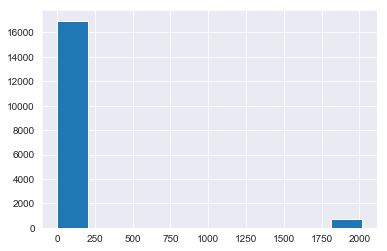

In [14]:
#Determine the mean, median, mode and distribution of values for 'yr_renovated'
display(df['yr_renovated'].describe())
display(df.yr_renovated.hist())
df.yr_renovated.value_counts(normalize=True).head()

95% of the known values for 'yr_renovated' are 0, with all other values representing less than .5% of overall data each. This results in 0 for both median and mode, and a mean value (83.7) which is untenable as a date. Considering this, along with the very wide range of values, it might be wise to drop the column altogether. Alternately, we can create a dummy variable that indicates whether or not a house hase been renovated at all, after replacing the null values with 0 and known values with 1. 

With less than 5% of houses having a renovation accounted for, it is unlikely that this will be a significnat predictor of price. Therefore we will drop the yr_renovated column. 

Note: considering the diminishing returns of renovations, another approach would be to bin the 'yr_renovated' values into more or less recently renovated homes. We can revist later if we find we do not have enough to make decently complex and accurate model. 

In [15]:
# Drop 'yr_renovated'
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Inconsistent Data

Now that we have removed all of the null values, we can check to see if there are any other things we should deal with, like placeholders or extreme outliers, before moving forward. We've already observed that 'sqft_basement' is suspiciously an object. We can check the rest of the values as well before we clean that up. 

In [17]:
# check the central tendencies of all columns for odd distributions
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007569,0.233863,3.409724,7.657425,1788.557537,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.086675,0.765686,0.650654,1.172643,827.745641,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


At this time no values stand out as having abnormal min, max, std, or mean. We'll check for other extraneous values. 

In [18]:
#Check the top five occuring values from each column to see if there are any that stand out
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006594
6/26/2014    0.006083
6/25/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    

A quick review of all columns shows than none of the top 5 values in any appear to be abnormal, except for 'sqft_basement', which has a placeholder '?' for approximately 2% of it's values. This explains why 'sqft_basement' currently appears as an object. Our options for this include dropping the records with '?', or imputing a value based on central tendencies (mean or median likely). Let's first figure out what those are. 

In [19]:
# isolate the values of 'sqft_basement' that are recorded and convert them to a float so 
# that we can observe traits
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

'sqft_basement' appears to be very skewed, with more than half of values being 0. Nevertheless, it appears we may be able to replace '?' with the average basement value without significantly changing the overall distribution. 

In [20]:
# set mean value
basement_mean = new_basement.sqft_basement.astype('float').mean()

#create a function to assign the desired values to the null value ('?') 
def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
# apply the function to the dataframe
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

#check to see how the function has been applied
display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [21]:
#check to see how much central tendencies were affected
df.sqft_basement.describe()

count    21534.000000
mean       291.359975
std        437.344152
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

The std and 75th quartile were slightly affected, but overall appears to be generally unaffected. 

### Adjusting Dates

Now, the last piece to deal with is the date column. It's currently an object, so we won't be able to use that for any analysis. But time of year likely does have some relation to housing prices, as housing markets tend to heat up in the summer. So, to make this more workable data, we can convert the date column to a datatime dtype and and then create two new columns with  day of the year and month values. We'll disregard the year for now because the date column reflects when the house was sold in the past. Those values can't be repeated again in the future, so they may not have much as predictive power for future prices.

note: a potential predictor could be 'years since last sold' 

In [22]:
# Import datetime and create two new columns for 'day of year' and 'month'
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
# check the values of our new columns
display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [23]:
# Check dateframe to see that new columns are present
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,49,2


The two new columns are created and at this point our data appear to be clean. We have:
* Checked for duplicates
* Droped 63 rows with null values for 'view'
* Imputed 2376 missing values for 'waterfront' 
* Dropped the 'yr_renovated' column with it's 3842 missing values
* Imputed missing values for 'sqft_basement' and converted it to a float
* Created two new columns with values for 'day_of_year' and 'month'

Now on to deeper exploration of the data. 

## Data Exploration

In this section we'll take a deeper look at our data and create visuals to learn more about it. We'll deal with categotical variables, use histograms, count/bar charts, box plots, and heatmaps, and we'll check for multicolinearity. Ultimately, we'll close the section out with a selected set of variables to begin buiding our model with.

### Dealing with Categorical Variables 

To begin identifying categorical values we can check to see how many unique values exist for each variable, undserstanding the the lower the number the more likely a value is to be a category. Additionally, there are some we already know to be categoricals based on what we have observed already (e.g. waterfront).

In [24]:
#count the number of unique values for each column in our data
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

id: 21357
date: 371
price: 3613
bedrooms: 12
bathrooms: 29
sqft_living: 1033
sqft_lot: 9760
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 11
sqft_above: 942
sqft_basement: 302
yr_built: 116
zipcode: 70
lat: 5029
long: 750
sqft_living15: 776
sqft_lot15: 8663
day_of_year: 355
month: 12


**Observations:**
Based on these counts (and what we already know) we can make some basic assumptions as to which are likely to be categorical or continuous. 

* _Potential Continuous variables:_
    * price (our dependent variable)
    * sqft_living
    * sqft_lot
    * sqft_above
    * sqft_basement
    * yr_built - will treat this as a continuous variable for now, but will keep and eye on it. It could also be a candidate for potential binning by decade - or turned into a value for age
    * lat
    * long
    * sqft)living15
    * sqft_lot15
* _Potential Categorical variables:_
    * bedrooms
    * bathrooms - there are a large number of unique values here for bathrooms in a house - we'll look into this more
    * floors
    * waterfront
    * view
    * condition
    * grade
    * zipcode
    * day_of_year - although there is a high number of values here we know there are only a limited number a potential values
    * month
* _Other:_
    * id 
    * date 
    
To make sure we have these right we can do quick analysis of the continuous variables by plotting them on a scatter plot and looking for the appropriate cloud shape. We'll dig deeper into each categorical to determine the best couse of action for them. 

But first, we can creat a new dataframe with only the varibles we know we will be working with, and drop the others (id, date). We've created a proxy for date with month and day_of_year, and id is too unique to have predicitve quality in our regression

In [25]:
# create new df without date, id
df2 = df.drop(['id', 'date'], axis=1)
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,286,10
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,343,12


In [26]:
# let's also create lists of our two variable groups for ease of working with them
# day_of_year is our largest categorical variable, we can use it to make our lists
cats = []
conts = []
for col in df2.columns:
    if df2[col].nunique() <= 356:
        cats.append(col)
    else:
        conts.append(col)
        
print(cats)
print(conts)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode', 'day_of_year', 'month']
['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


We have a lot of categorical variables to inspect! Let's take a qiuck look at our continuous variables first to make sure we have them right. 

### Inspecting Continuous Variables

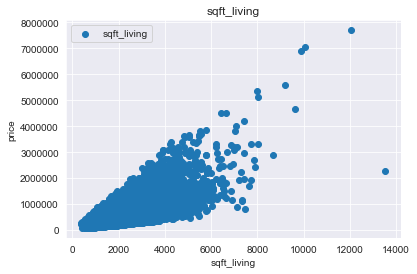

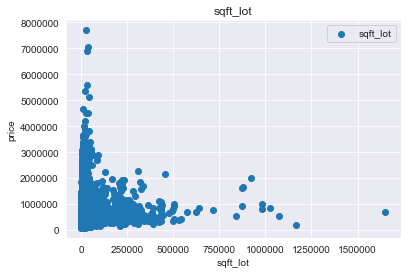

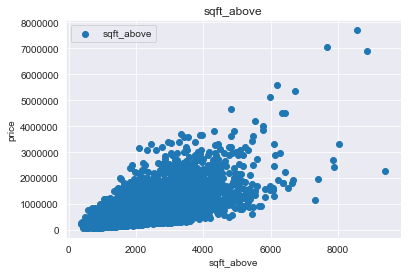

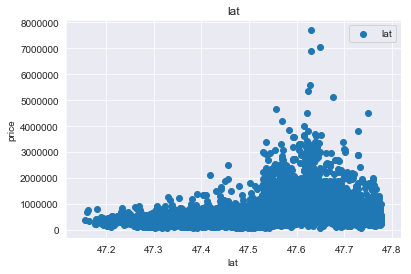

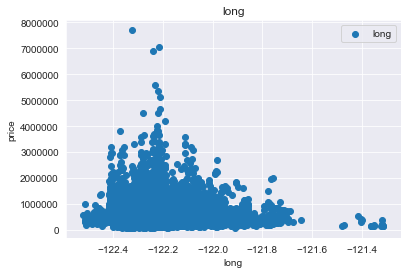

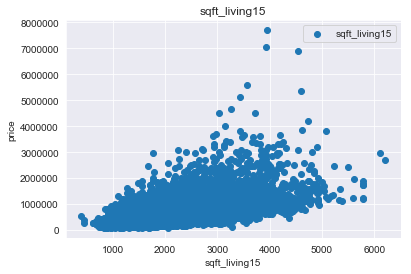

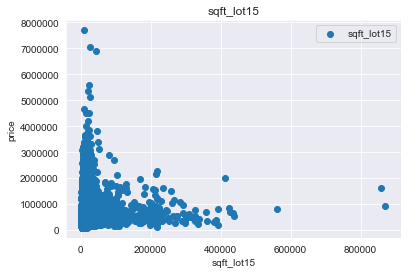

In [40]:
# create a sacatter plot for each continuous variable execpt for price
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

**Obeservations:** Each varialble appears to be appropriately distributed to be a continous variable. There do appear to be a number of outliers we can deal with. Let's look at central tendencies for these variables and histograms. Other observations include: 
* sqft_living: appears to have a fairly linear relationship with more variation as x increases
* sqft_lot: there is not an obvious linear relationship, and an interesting L-shape, perhaps indicating high value in * high density areas as well as larger properties 
* sqft_above: similar to sqft_living
* lat: There may be some linear relationship, but there is definitely more concentration of sales and greater values at great values of lat, suggesting there could be some relationship
* long: similar to long, we should get a better idea of concentrations of price in another visual
* sqft_living15: similar to other sqft variables, but seems flatter. Will have to check for linear relationship
* sqft_lot15: similar to sqft_lot

### Outlier Analysis

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,2079.827854,1.509060e+04,1788.557537,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,917.446520,4.138021e+04,827.745641,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,370.000000,5.200000e+02,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.617000e+03,1560.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068775e+04,2210.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,47.777600,-121.315000,6210.000000,871200.000000


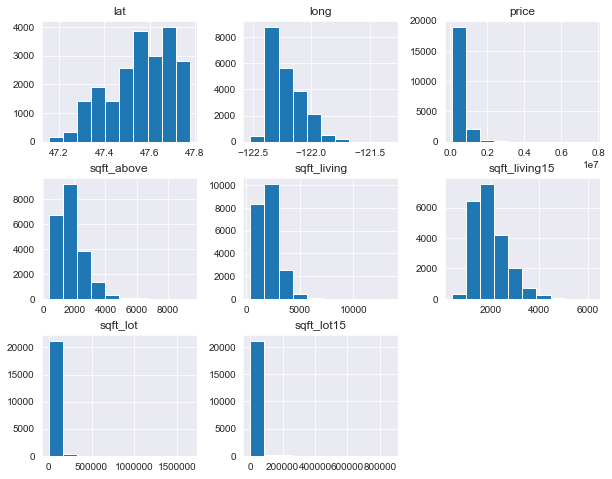

In [291]:
df_conts = df2.loc[:,conts]
df_conts.hist(figsize=(10,8))
df_conts.describe()

Visual inspection of the above shows right skewed distributions for many of our variables, and observing central tendencies tells us that max values are much greater than 3 standard deviations away from the mean for price, sqft_living, sqft_above, sqft_lot, sqft_lot15, and sqft_living15. 

Since much of this skewness may be driven by the same entries, we can remove outliers one values at a time to see how it effects others to avoid over correcting. 

In [306]:
# starting with sqft_living, lets count the number of values that are more 8000sqft, which is where we begin to see
# separation our scatter plot
upper_limit = 8000
outlier_count = df2[df2['sqft_living'] > upper_limit]
len(outlier_count)

9

9 entries is a relatively low amount, let's remove those entries and see what it does to our distributions

In [319]:
df_sqft_drop = df2[df2['sqft_living'] < 8000]
df_sqft_drop.sqft_living.describe()

count    21503.000000
mean      2075.508487
std        900.958191
min        370.000000
25%       1423.500000
50%       1910.000000
75%       2550.000000
max       7880.000000
Name: sqft_living, dtype: float64

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.150300e+04,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000
mean,5.376469e+05,2075.508487,14297.268381,1785.159001,47.560249,-122.214129,1985.263591,12523.730735
std,3.505857e+05,900.958191,31957.465596,817.772758,0.138487,0.140503,683.900573,25260.884331
min,7.800000e+04,370.000000,520.000000,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,1423.500000,5040.000000,1190.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7609.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000
75%,6.430000e+05,2550.000000,10650.000000,2210.000000,47.678150,-122.125000,2360.000000,10077.000000
max,4.500000e+06,7880.000000,499571.000000,7880.000000,47.777600,-121.315000,6210.000000,560617.000000


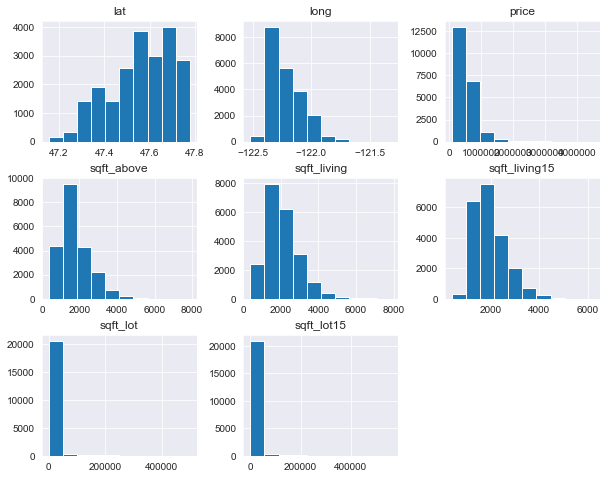

In [320]:
df2 = df_sqft_drop
df_conts = df2.loc[:,conts]
df_conts.hist(figsize=(10,8))
df_conts.describe()

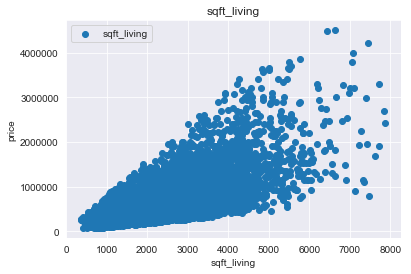

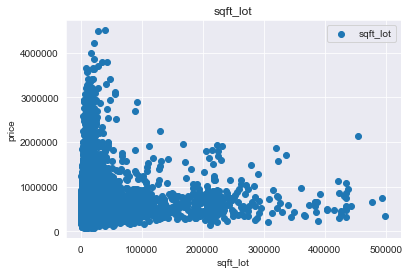

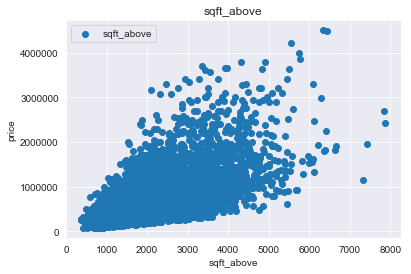

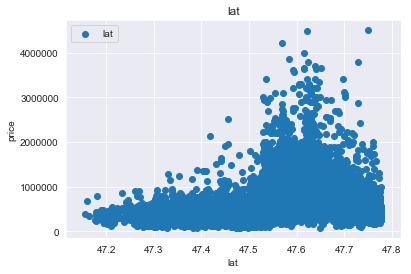

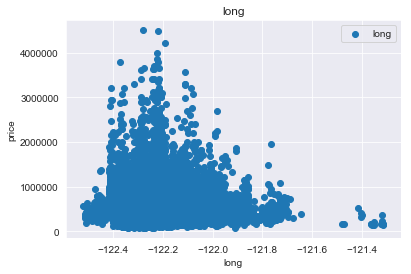

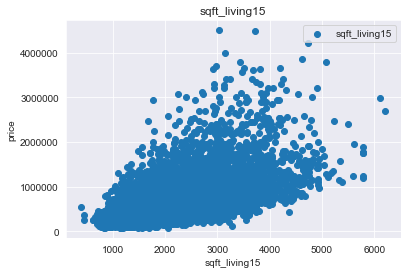

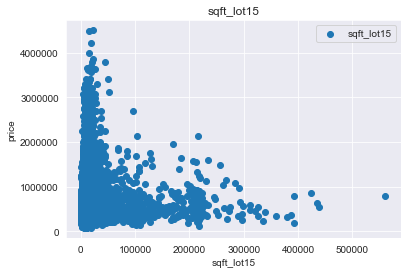

In [321]:
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

This looks much better! But, there still seem to be a number of outliers remaining for sqft-lot. Let're remove those as well and check again. 

In [322]:
# Visual inspection of the sqft_lot shows us the values begin to become very spread out after 500000sqft
upper_limit = 500000
outlier_count = df2[df2['sqft_lot'] >= upper_limit]
len(outlier_count)

0

Again, a relatively low number of entries given the size of our data. Let's remove them and see where we are.

In [323]:
df_lot_drop = df2[df2['sqft_lot'] <= 500000]
df_lot_drop.sqft_lot.describe()

count     21503.000000
mean      14297.268381
std       31957.465596
min         520.000000
25%        5040.000000
50%        7609.000000
75%       10650.000000
max      499571.000000
Name: sqft_lot, dtype: float64

,price,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
count,2.150300e+04,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000,21503.000000
mean,5.376469e+05,2075.508487,14297.268381,1785.159001,47.560249,-122.214129,1985.263591,12523.730735
std,3.505857e+05,900.958191,31957.465596,817.772758,0.138487,0.140503,683.900573,25260.884331
min,7.800000e+04,370.000000,520.000000,370.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,1423.500000,5040.000000,1190.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7609.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000
75%,6.430000e+05,2550.000000,10650.000000,2210.000000,47.678150,-122.125000,2360.000000,10077.000000
max,4.500000e+06,7880.000000,499571.000000,7880.000000,47.777600,-121.315000,6210.000000,560617.000000


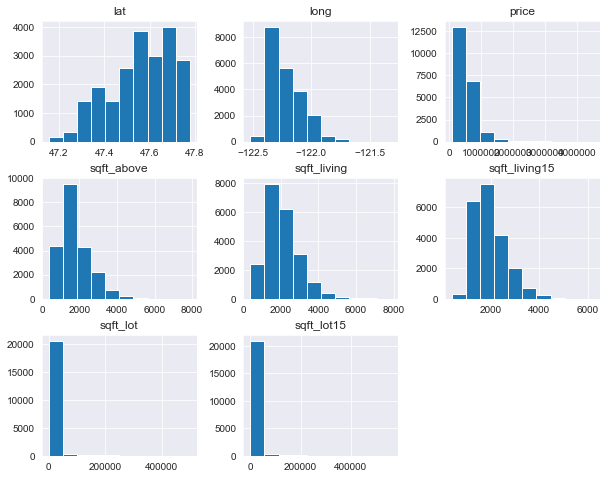

In [324]:
df2 = df_lot_drop
df_conts = df2.loc[:,conts]
df_conts.hist(figsize=(10,8))
df_conts.describe()

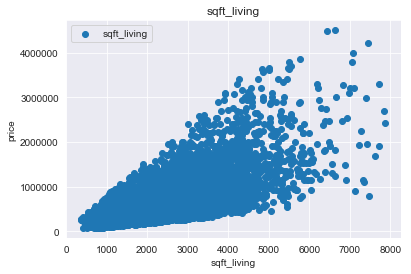

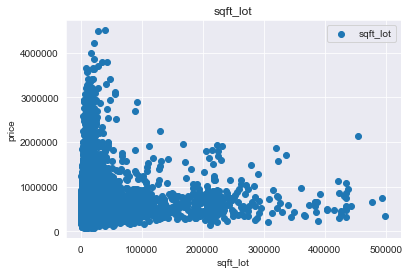

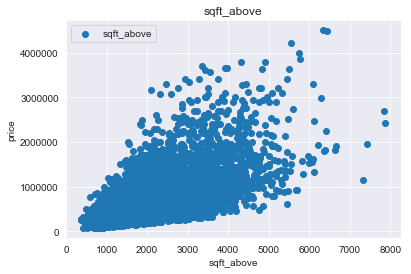

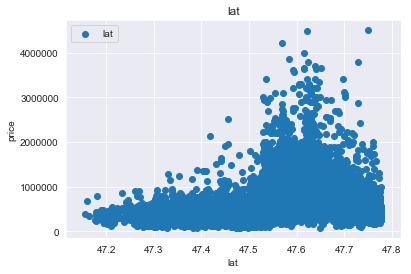

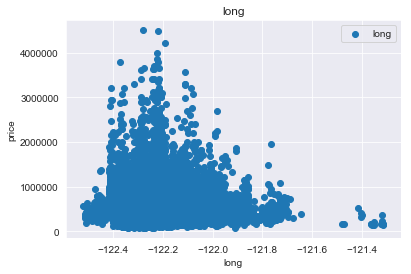

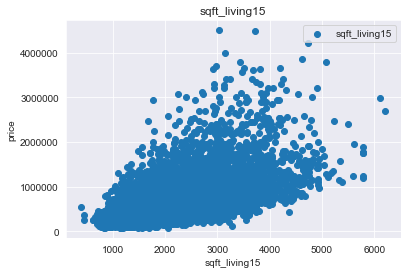

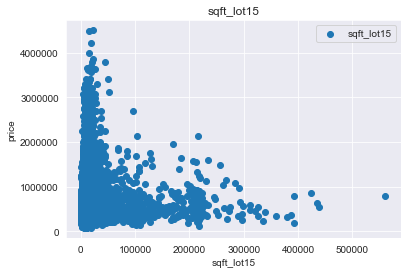

In [325]:
for col in conts[1:]: 
    plt.scatter(df2[col], df2.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

These distributions look much better. Overall skewness has been reduced 

### Analyzing Categorical Variables


Let's take a look at our categoricals and determine what we want to do with them.

In [43]:
# To better learn seaborn I have created a funciton here to take a list of values and plot a series of graphs and charts
# function is meant to take a list of independent variables, a dependent variable, and a daraframe that contains both
def seaborn_plotter(independent_vs, dependent_v, df):

#Loop through the independent variables, putting a divider between each iteration with the variable name
    for i in independent_vs:
        print ("Kings County Data Set - Exploratory Data Analysis for: " + i)
        print ("-------------------------------------------------------------------------------------")
        
        #create subplots for each visual 
        plt.figure(figsize=(12,12))
        ax1 = plt.subplot(2,2,1)
        ax2 = plt.subplot(2,2,2)
        ax3 = plt.subplot(2,2,3)
        ax4 = plt.subplot(2,2,4)
        
        #seaborn boxplot and set labels - shows range, quartiles, and median for each category value        
        a = sns.boxplot(x=i, y=dependent_v, data=df, ax=ax3)
        a.axes.set_title('Boxplot' ,fontsize=20)
        a.set_xlabel(i,fontsize=15)
        a.set_ylabel('Price', fontsize=15)
        a.tick_params(labelsize=10)
        
        #seaborn countplot and set labels - counts number of each category occuring 
        b = sns.countplot(df[i], ax=ax4)
        b.axes.set_title('Variable Count' ,fontsize=20)
        b.set_xlabel(i,fontsize=15)
        b.set_ylabel('Count', fontsize=15)
        b.tick_params(labelsize=10)
        
        #seaborn scatterplot and set labels - shows relationship of category and price
        c = sns.scatterplot(x=i, y=dependent_v, data=df, ax=ax1)
        c.axes.set_title('Scatterplot' ,fontsize=20)
        c.set_xlabel(i,fontsize=15)
        c.set_ylabel('Price', fontsize=15)
        c.tick_params(labelsize=10)
        
        #seaborn distplot and set labels - plots distribution of category values
        d = sns.distplot(df[i], ax=ax2)
        d.axes.set_title('Histogram',fontsize=20)
        d.set_xlabel(i,fontsize=15)
        d.set_ylabel('KDE', fontsize=15)
        d.tick_params(labelsize=10)
        
        plt.show()
        
        #Input an observation for each variable         
        input('Observations: ')
        input('Approach: ')
        print("\n")

Kings County Data Set - Exploratory Data Analysis for: bedrooms
-------------------------------------------------------------------------------------


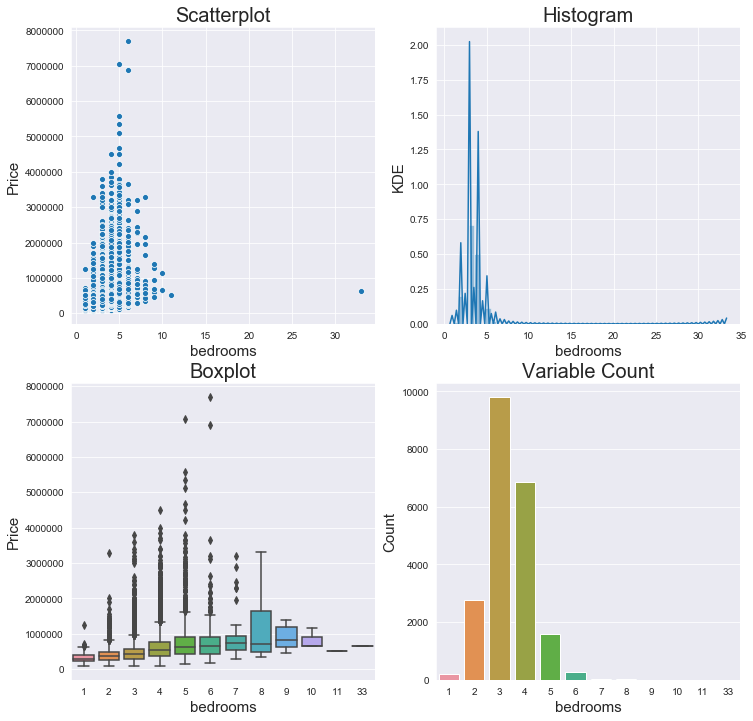

Observations: The column like scatter of a categorical variable is present, and there is an odd looking value out to the right (33 bedrooms) to look into further. The boxplot shows some increase in median value as number of rooms goes up, which makes sense. This is likely a good predictor of price.
Approach: We will look into potential outliers and then bin this value into ranges. If we control some of the larger outlier we may actually be able to get more normal distribution


Kings County Data Set - Exploratory Data Analysis for: bathrooms
-------------------------------------------------------------------------------------


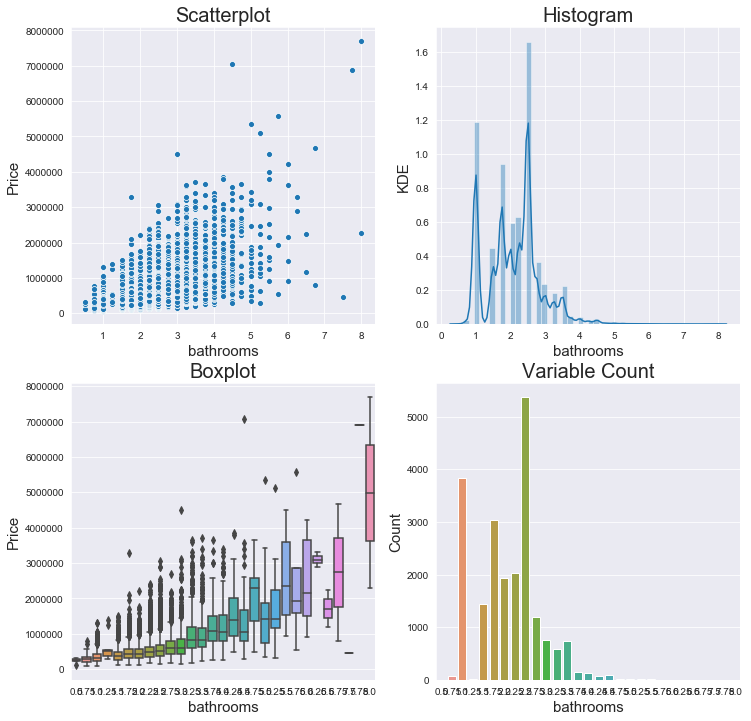

Observations: The column-like scatter and histogram is present again, but there also appears to be some linearity. The boxplot shows an increase in median price as x goes up and greater range again. 
Approach: We can bin this variable as well, as it appears that it will have some predictive ability


Kings County Data Set - Exploratory Data Analysis for: floors
-------------------------------------------------------------------------------------


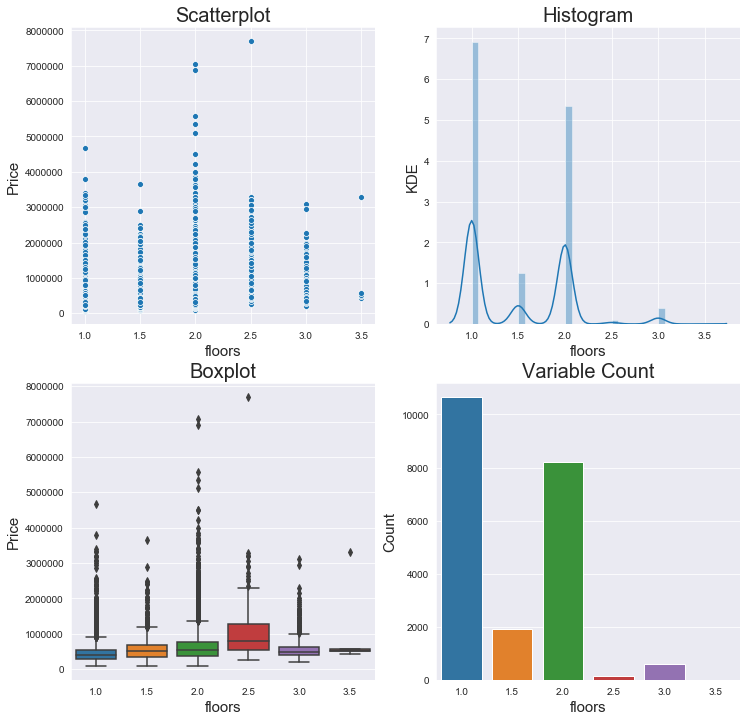

Observations: Clear column formation of a categorical variable, and this time with less unique values. The median price values for each category don't appear to change as significantly. This is a little counterintuitive as one might assume that a larger number of floors is a proxy for larger home size, which also indicated greater price. This value make have less predictive ability.
Approach: We should look for collinearity with sqft. We can also try to bin this down to 3 values instead of 6 


Kings County Data Set - Exploratory Data Analysis for: waterfront
-------------------------------------------------------------------------------------


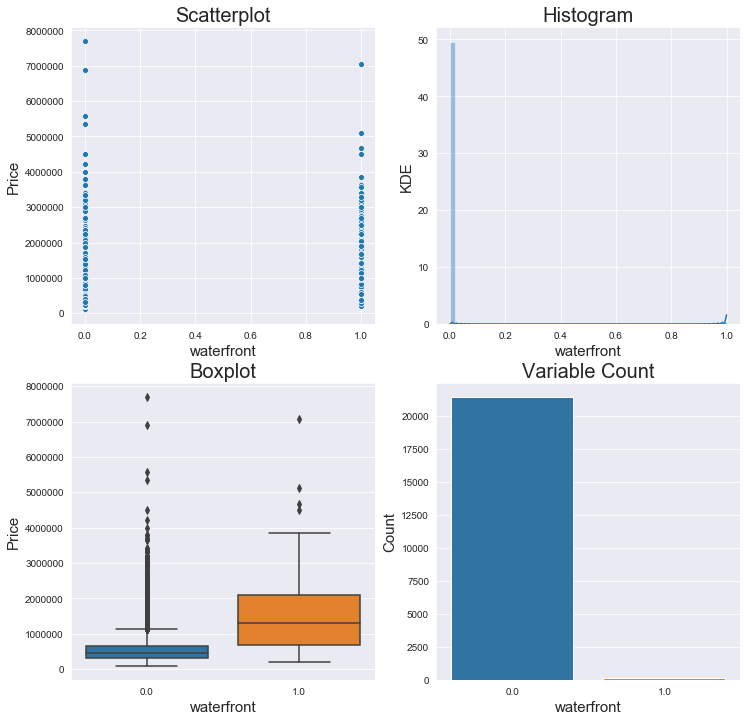

Observations: waterfront is clearly a categorical value with some predictive ability based on the higher median value in the boxplot
Approach: We can one-hot bin this easily as it won't create too much more to work with (2 columns)


Kings County Data Set - Exploratory Data Analysis for: view
-------------------------------------------------------------------------------------


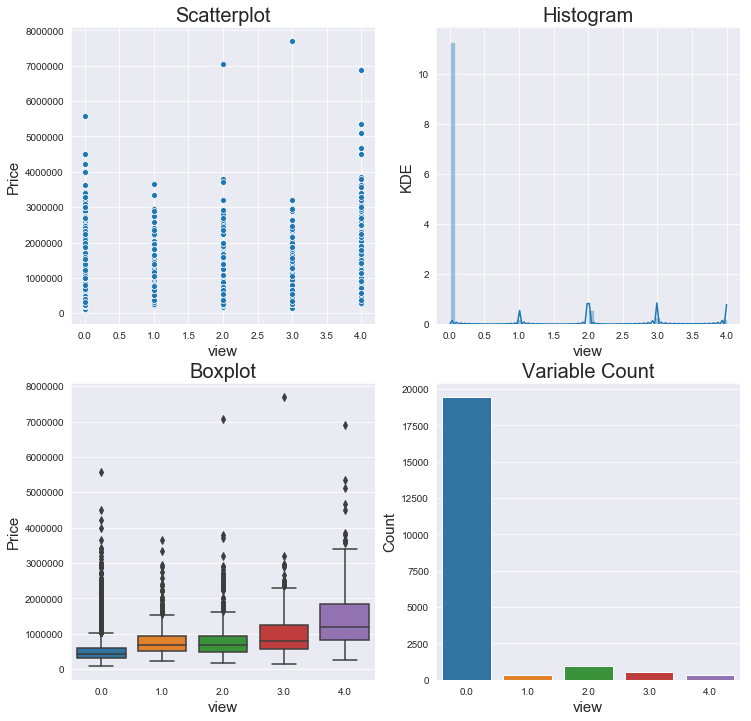

Observations: View is interesting. Again it is clearly categorical, but the relationship between how many times a home has been viewed and price is not intuitive. Perhaps more views drives competition. With so many 0 values for this variable and only small variation in median price it is likely not a great predictor
Approach: The best way to use this may be to create a binary and bin that way - 0 views vs Any views


Kings County Data Set - Exploratory Data Analysis for: condition
-------------------------------------------------------------------------------------


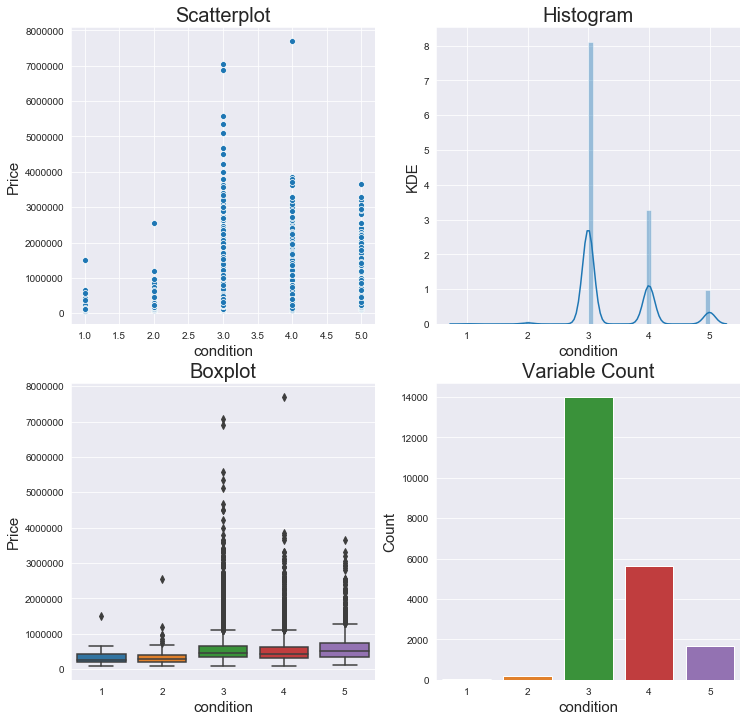

Observations: condition would intuitively seem to have a significant influence on price, but median values seem to have little change. Perhaps because most are rated in the middle values. It's also interesting that there appear to be more medium rated expensive homes the highly rated ones
Approach: Create dummy variables


Kings County Data Set - Exploratory Data Analysis for: grade
-------------------------------------------------------------------------------------


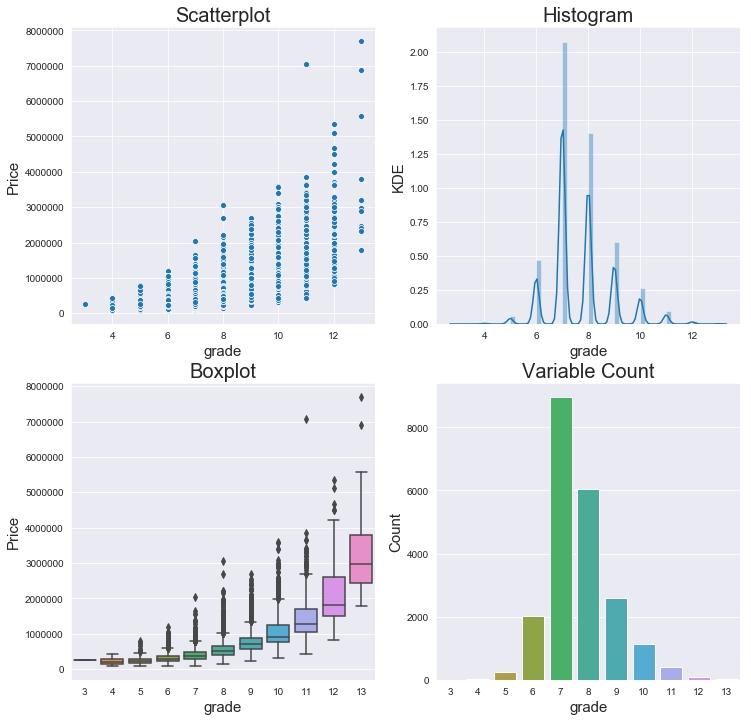

Observations: Grade is categorical but appears to have some level of linear relationship, as prices go up in the scatter and box plot as grade goes up. It will be interesting to see if there is any relationship between grade and condition. Grade also appears to have a more normal distribution. It might be a good predictor.
Approach: With 13 variables it will be best to create dummy variables and bin this category.


Kings County Data Set - Exploratory Data Analysis for: sqft_basement
-------------------------------------------------------------------------------------


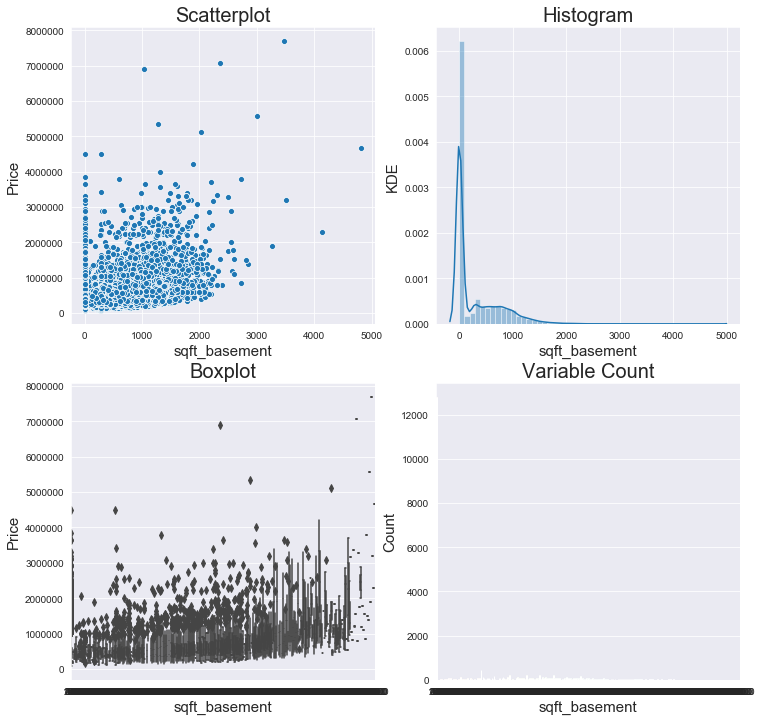

Observations: sqft_basement is clearly a continuous variable that snuck in under our categorical variable counts (due to day_of_year being our cutoff). It is interesting that it has a low number of unique values compare to other continuous variables, obviously due to the large number of home with 0 basement space. 
Approach: treat as a continuous variable


Kings County Data Set - Exploratory Data Analysis for: yr_built
-------------------------------------------------------------------------------------


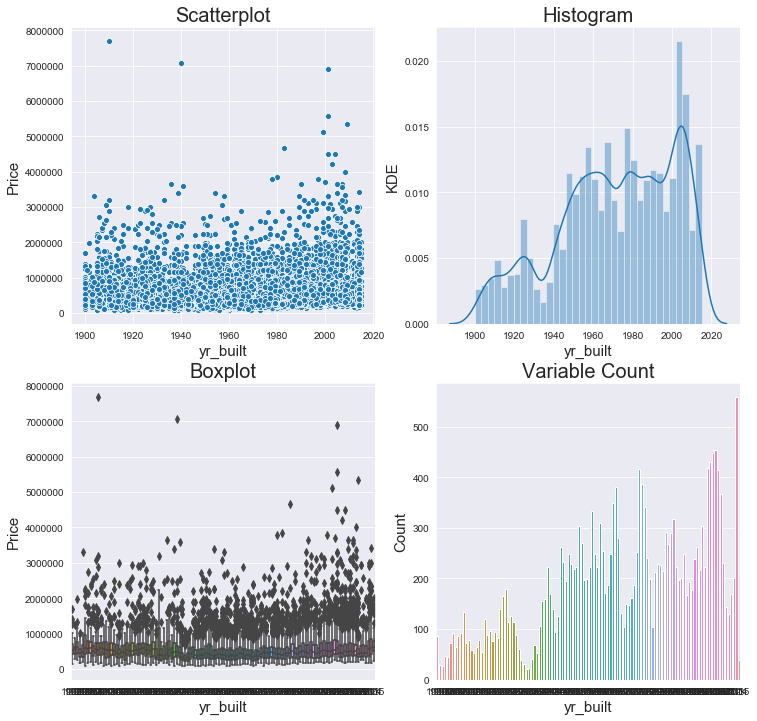

Observations: yr_built has a high enough number of values it looks like it could be treated ad a continuous variable as well. Although it appears that the linearity of the relationship doesn't look that strong. This may not actually be that strong of a predictor. Newer homes don't appear to be that much differently priced than older ones. Although, there are many more of them. 
Approach: Treat as a continuous variable for now. Bin into decades or create an 'age' variable as an experiment to introduce some differentiation. 


Kings County Data Set - Exploratory Data Analysis for: zipcode
-------------------------------------------------------------------------------------


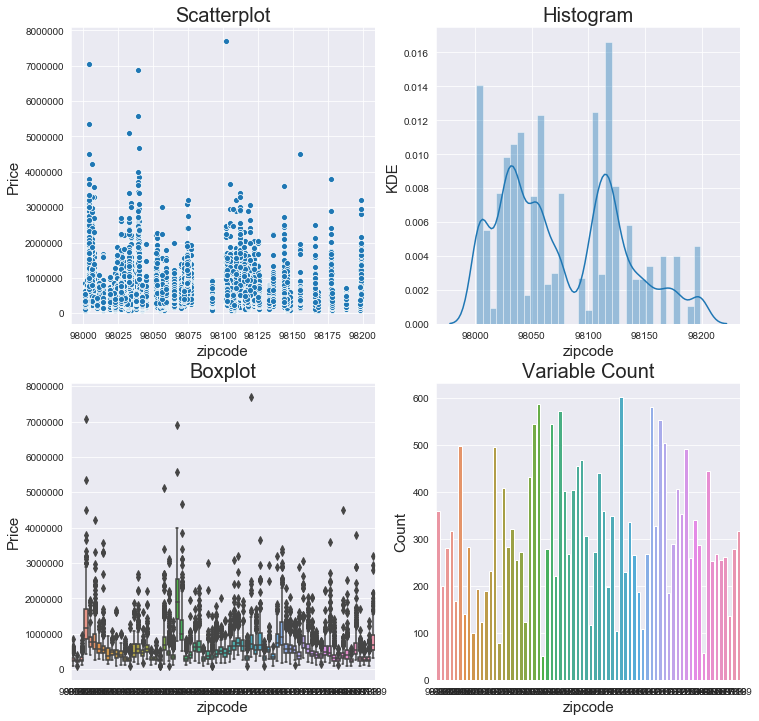

Observations: Zipcode is interesting because intuitively it would seem that some areas are better indicators of price than others(i.e. the 'nice' part of town). Here we see a great deal of variability across categories without obvious relationships to price
Approach: With 70 different categories for zipcode it would be unwieldy to create a dummy variable for each, and bins to not make as much sense as other categorical variables because zipcodes are not uniform. With lat an long included in this data set those may serve as better variables for predicting price based on area of town.  


Kings County Data Set - Exploratory Data Analysis for: day_of_year
-------------------------------------------------------------------------------------


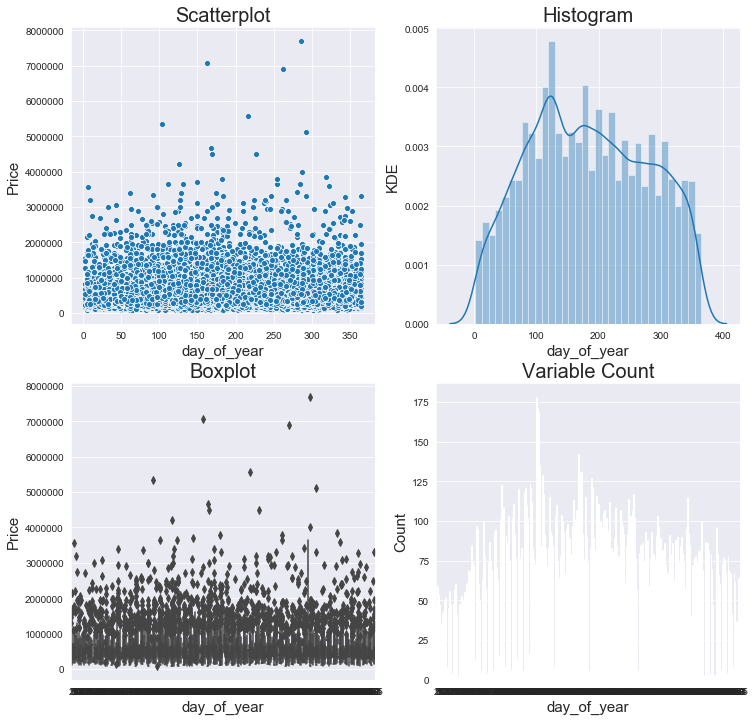

Observations: day_of_year was hypothesized to have some predictive values based on seasonality, but here we see that the scatter plot shows a relatively flat relationship. This makes sense because the days aren't truly 'increasing' through the year. Although it is interesting that the histogram shows some level of distribution, the greatest number of sales come in mid year.
Approach: It would be very unwieldy to create dummy variables for this many unique values, and we in fact already have bins in the next variable, months. 


Kings County Data Set - Exploratory Data Analysis for: month
-------------------------------------------------------------------------------------


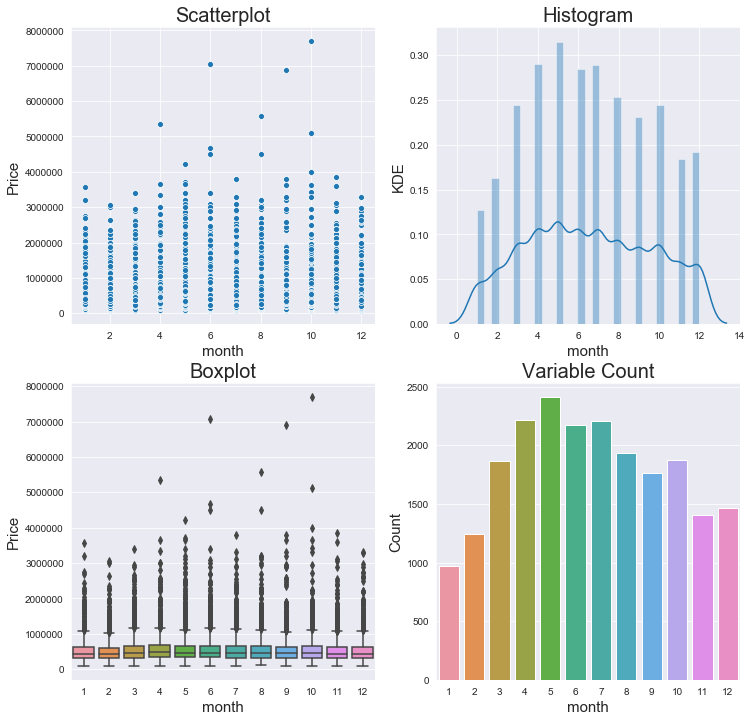

Observations: This is more digestible set of information that what we have for days. It still shows little variability in price across months in our box plot, but because I really want to know if time of year has as little of an effect as this appears we can keep it for now.
Approach: We can create dummy variables for this category, but to make it easier to work with ew can bin it by quarter. 




In [44]:
seaborn_plotter(cats, df2.price, df2)

That was a fun look at our categorical variables! 
**As a review we will:**
* Check into the bedroom outlier (33 bedrooms?) and then create dummy variables and bins
* Create dummy variables and bins for: bathrooms, floor, view, condition, and grade
* We'll leave yr_built alone for now, but keep an eye on it
* Drop zipcode and day_of_year
* Bin month into quarters

That's going to be a lot of bins! 

### Creating Dummy Variables and Binning

In [105]:
# drop the variables we've decided we are not going to work with
df3 = df2.drop(['zipcode', 'day_of_year'], axis=1)
df3.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12


**Bedrooms**

In [108]:
# look into the bedroom outlier
df.loc[df["bedrooms"] == 33,].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month


Upon further inspection this is clearly an error - this house has 33 bedrooms, but 1.75 bathrooms and 1620sqft of living space. It's likely meant to be 3 bedrooms and an entry error. We can update that entry.

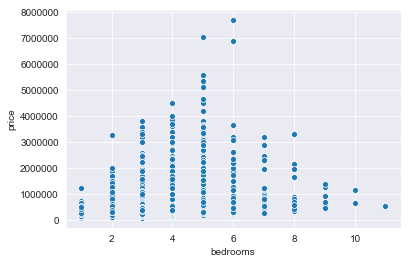

count    21534.000000
mean         3.371645
std          0.904144
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [112]:
df3.loc[df3["bedrooms"] == 33, "bedrooms"] = 3
sns.scatterplot(x='bedrooms', y='price', data=df3)
plt.show()
df.bedrooms.describe()

This looks mich better. 

In [113]:
# create dummy variables and bins for bedrooms
# make 6 bins
bins = [0, 1, 2, 3, 4, 6, 11]
# use pd.cut to return unordered categories
bins_br = pd.cut(df3['bedrooms'], bins)
# return ordered categories
bins_br = bins_br.cat.as_ordered()
bins_br.head()

0    (2, 3]
1    (2, 3]
2    (1, 2]
3    (3, 4]
4    (2, 3]
Name: bedrooms, dtype: category
Categories (6, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 6] < (6, 11]]

Text(0.5, 1.0, 'Bedroom Bins')

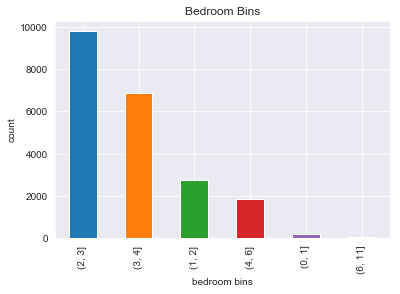

In [114]:
# see what our distribution of bins looks like
bins_br.value_counts().plot(kind='bar')
plt.xlabel('bedroom bins')
plt.ylabel('count')
plt.title('Bedroom Bins')

In [115]:
# replace existing bedrooms columns
df3['bedrooms']=bins_br

In [116]:
# perform label encoding
df3['bedrooms'] = df3['bedrooms'].cat.codes

In [117]:
# create dummy variables
br_dummy = pd.get_dummies(bins_br, prefix='br')

In [118]:
# drop existing column
df3 = df3.drop(['bedrooms'], axis=1) 

In [119]:
df3.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10
1,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12
2,180000.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,2
3,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,12
4,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,2


In [120]:
df3 = pd.concat([df3, br_dummy], axis=1)
df3.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,month,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]"
0,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,...,-122.257,1340,5650,10,0,0,1,0,0,0
1,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,...,-122.319,1690,7639,12,0,0,1,0,0,0
2,180000.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,...,-122.233,2720,8062,2,0,1,0,0,0,0
3,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,...,-122.393,1360,5000,12,0,0,0,1,0,0
4,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,...,-122.045,1800,7503,2,0,0,1,0,0,0


**Bathrooms**

In [121]:
d f.bathrooms.describe()

count    21534.000000
mean         2.115712
std          0.768602
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [122]:
# create dummy variables and bins for bathrooms
# make 4 bins
bins = [0, 1, 2, 3, 8]
# use pd.cut to return unordered categories
bins_bth = pd.cut(df3['bathrooms'], bins)
# return ordered categories
bins_bth = bins_bth.cat.as_ordered()
bins_bth.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 8]]

Text(0.5, 1.0, 'Bathroom Bins')

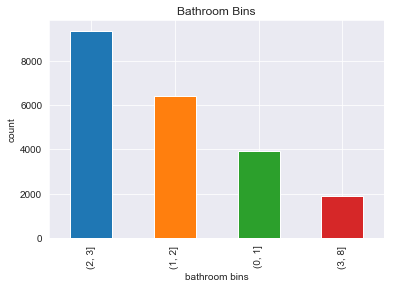

In [123]:
# see what our distribution of bins looks like
bins_bth.value_counts().plot(kind='bar')
plt.xlabel('bathroom bins')
plt.ylabel('count')
plt.title('Bathroom Bins')

In [124]:
# replace existing bathroom columns
df3['bathrooms']=bins_bth
# perform label encoding
df3['bathrooms'] = df3['bathrooms'].cat.codes
# create dummy variables
bth_dummy = pd.get_dummies(bins_bth, prefix='bth')
# drop existing column
df3 = df3.drop(['bathrooms'], axis=1)
# add dummy columns
df3 = pd.concat([df3, bth_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]"
0,221900.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,...,0,0,1,0,0,0,1,0,0,0
1,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,...,0,0,1,0,0,0,0,0,1,0


**Floors**

In [125]:
df.floors.describe()

count    21534.000000
mean         1.494126
std          0.539806
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [126]:
# create dummy variables and bins for floors
# make 3 bins
bins = [0, 1, 2, 3.5]
# use pd.cut to return unordered categories
bins_flr = pd.cut(df3['floors'], bins)
# return ordered categories
bins_flr = bins_flr.cat.as_ordered()
bins_flr.head()

0    (0.0, 1.0]
1    (1.0, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.0] < (1.0, 2.0] < (2.0, 3.5]]

Text(0.5, 1.0, 'Floors Bins')

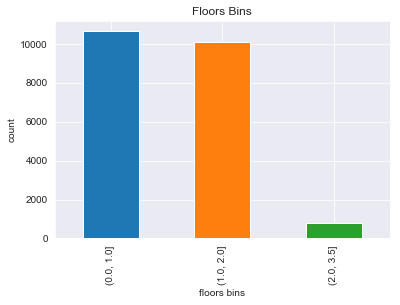

In [127]:
# see what our distribution of bins looks like
bins_flr.value_counts().plot(kind='bar')
plt.xlabel('floors bins')
plt.ylabel('count')
plt.title('Floors Bins')

In [128]:
# replace existing floors columns
df3['floors']=bins_flr
# perform label encoding
df3['floors'] = df3['floors'].cat.codes
# create dummy variables
flr_dummy = pd.get_dummies(bins_flr, prefix='flr')
# drop existing column
df3 = df3.drop(['floors'], axis=1)
# add dummy columns
df3 = pd.concat([df3, flr_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,"br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]"
0,221900.0,1180,5650,0.0,0.0,3,7,1180,0.0,1955,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,3,7,2170,400.0,1951,...,0,0,0,0,0,1,0,0,1,0


**View**

In [129]:
df3.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [130]:
df3.loc[df3["view"] > 0, "view"] = 1

In [133]:
df3.view.value_counts()

0.0    19422
1.0     2112
Name: view, dtype: int64

In [111]:
df3.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,2


**Condition**

In [134]:
df3.condition.describe() 

count    21534.000000
mean         3.409724
std          0.650654
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [135]:
# create dummy variables and bins for condition
# make 5 bins
bins = [0, 1, 2, 3, 4, 5]
# use pd.cut to return unordered categories
bins_cond = pd.cut(df3['condition'], bins)
# return ordered categories
bins_cond = bins_cond.cat.as_ordered()
bins_cond.head()

0    (2, 3]
1    (2, 3]
2    (2, 3]
3    (4, 5]
4    (2, 3]
Name: condition, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

Text(0.5, 1.0, 'Condition Bins')

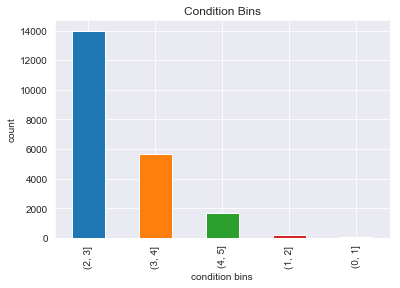

In [137]:
# see what our distribution of bins looks like
bins_cond.value_counts().plot(kind='bar')
plt.xlabel('condition bins')
plt.ylabel('count')
plt.title('Condition Bins')

In [138]:
# replace existing condition columns
df3['condition']=bins_cond
# perform label encoding
df3['condition'] = df3['condition'].cat.codes
# create dummy variables
cond_dummy = pd.get_dummies(bins_cond, prefix='cond')
# drop existing column
df3 = df3.drop(['condition'], axis=1)
# add dummy columns
df3 = pd.concat([df3, cond_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,yr_built,lat,...,"bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]"
0,221900.0,1180,5650,0.0,0.0,7,1180,0.0,1955,47.5112,...,0,0,1,0,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,7,2170,400.0,1951,47.7210,...,1,0,0,1,0,0,0,1,0,0


**Grade**

In [139]:
df3.grade.describe()

count    21534.000000
mean         7.657425
std          1.172643
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [140]:
# create dummy variables and bins for grade
# make 4 bins
bins = [3, 5, 7, 9, 13]
# use pd.cut to return unordered categories
bins_grd = pd.cut(df3['grade'], bins)
# return ordered categories
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0    (5, 7]
1    (5, 7]
2    (5, 7]
3    (5, 7]
4    (7, 9]
Name: grade, dtype: category
Categories (4, interval[int64]): [(3, 5] < (5, 7] < (7, 9] < (9, 13]]

Text(0.5, 1.0, 'Grade Bins')

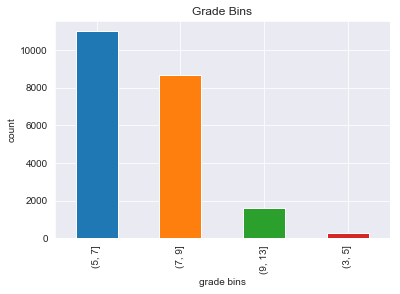

In [141]:
# see what our distribution of bins looks like
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('grade bins')
plt.ylabel('count')
plt.title('Grade Bins')

In [142]:
# replace existing grade columns
df3['grade']=bins_grd
# perform label encoding
df3['grade'] = df3['grade'].cat.codes
# create dummy variables
grd_dummy = pd.get_dummies(bins_grd, prefix='grd')
# drop existing column
df3 = df3.drop(['grade'], axis=1)
# add dummy columns
df3 = pd.concat([df3, grd_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,lat,long,...,"flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,1,0,0


**Month**

In [143]:
# create dummy variables and bins for month
# make 4 bins
bins = [0, 3, 6, 9, 12]
# use pd.cut to return unordered categories
bins_mnth = pd.cut(df3['month'], bins)
# return ordered categories
bins_mnth = bins_mnth.cat.as_ordered()
bins_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

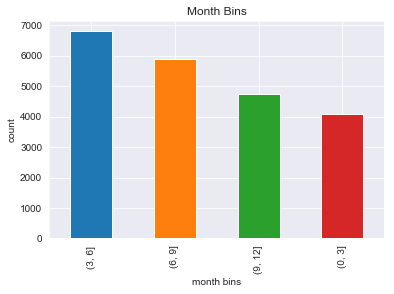

In [144]:
# see what our distribution of bins looks like
bins_mnth.value_counts().plot(kind='bar')
plt.xlabel('month bins')
plt.ylabel('count')
plt.title('Month Bins')

In [145]:
# replace existing grade columns
df3['month']=bins_mnth
# perform label encoding
df3['month'] = df3['month'].cat.codes
# create dummy variables
mnth_dummy = pd.get_dummies(bins_mnth, prefix='season')
# drop existing column
df3 = df3.drop(['month'], axis=1)
# add dummy columns
df3 = pd.concat([df3, mnth_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,lat,long,...,"cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,47.5112,-122.257,...,0,0,0,1,0,0,0,0,0,1
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,47.7210,-122.319,...,0,0,0,1,0,0,0,0,0,1


### Looking more deeply into location with Lat & Long

Intuitively it would seem that locaiton matters in home sale prices, yet above it seemed that the linearity of relationship between lat, long, and price was not very strong. We can explore more here by plotting all the valeus together in a color scaled heat map, and determine what to do next.

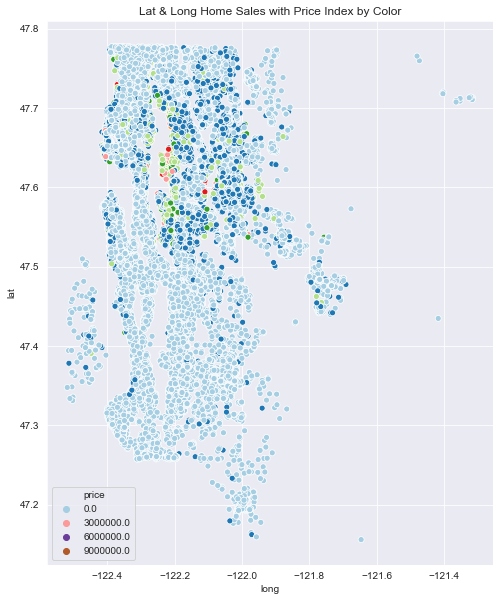

In [170]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df3, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

**Obervations:**  It appears that there are indeed concentrations of higher priced home sales based on concentrated locations. One way to potentially make this information more workable for our model may be to divide Kings County into quadrants based on Lat and Long by binning both values into 2 segements, essentially creating coordinates like ([0,0], [0,1], [1,0], [1,1])

In [172]:
# create dummy variables and bins for lat
# make 2 bins
bins = [47, 47.5, 47.8]
# use pd.cut to return unordered categories
bins_lat = pd.cut(df3['lat'], bins)
# return ordered categories
bins_lat = bins_lat.cat.as_ordered()
bins_lat.head()

0    (47.5, 47.8]
1    (47.5, 47.8]
2    (47.5, 47.8]
3    (47.5, 47.8]
4    (47.5, 47.8]
Name: lat, dtype: category
Categories (2, interval[float64]): [(47.0, 47.5] < (47.5, 47.8]]

In [174]:
# replace existing lat columns
df3['lat']=bins_lat
# perform label encoding
df3['lat'] = df3['lat'].cat.codes
# create dummy variables
lat_dummy = pd.get_dummies(bins_lat, prefix='lat')
# drop existing column
df3 = df3.drop(['lat'], axis=1)
# add dummy columns
df3 = pd.concat([df3, lat_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,long,sqft_living15,...,"grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","season_(47.0, 47.5]","season_(47.5, 47.8]","lat_(47.0, 47.5]","lat_(47.5, 47.8]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,-122.257,1340,...,0,0,0,0,0,1,0,1,0,1
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,-122.319,1690,...,0,0,0,0,0,1,0,1,0,1


In [186]:
# create dummy variables and bins for long
# make 2 bins
bins = [-122.6, -122, -121]
# use pd.cut to return unordered categories
bins_long = pd.cut(df3['long'], bins)
# return ordered categories
bins_long = bins_long.cat.as_ordered()
bins_long.head()

0    (-122.6, -122.0]
1    (-122.6, -122.0]
2    (-122.6, -122.0]
3    (-122.6, -122.0]
4    (-122.6, -122.0]
Name: long, dtype: category
Categories (2, interval[float64]): [(-122.6, -122.0] < (-122.0, -121.0]]

In [187]:
# replace existing lat columns
df3['long']=bins_long
# perform label encoding
df3['long'] = df3['long'].cat.codes
# create dummy variables
long_dummy = pd.get_dummies(bins_long, prefix='long')
# drop existing column
df3 = df3.drop(['long'], axis=1)
# add dummy columns
df3 = pd.concat([df3, long_dummy], axis=1)
df3.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,"grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
0,221900.0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,...,0,0,0,0,0,1,0,1,1,0
1,538000.0,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,...,0,0,0,0,0,1,0,1,1,0


### Data Exploration Conclusions

After review of our data a few early trends appear to be emerging that we may be able form hypotheses around: 
* Square footage appears to have the most linear relationship with price, with grade, bedrooms, bathrooms, and waterfront having the next most significant relationships
* Surprisingly time of year (season) may not have as a much impact, but we will contintue to include it for now to see if a significant relationship emerges in our model
* Location does appear to have some relationship with price. We have divided location into quadrants, which may end up being too broad. If so we can try to segement further and look for more signicficance. 

## Feature Engineering

In this section we will work to select important features for our model.
* Check for multicolinearity
* Normalize and scale features where necessary

In [189]:
# To analyze our independent variables we will create a slice of the dataframe without 'price'
df_dv = df3.iloc[:,1:]
df_dv.head(2)

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]",...,"grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,...,0,0,0,0,0,1,0,1,1,0
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,...,0,0,0,0,0,1,0,1,1,0


### Multicolinearity

We'll begin by checking the correlation structure of our predictors. This is important because high correlation between variables indicates that changes in one predictor are closely associated with changes in another. We want the variables in our model to be as independent as possible. 

In [253]:
# check the correltion of each variable
pd.set_option('display.max_columns', 500)
df_dv.corr()

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
sqft_living,1.000000,0.173768,0.096930,0.269271,0.876553,0.428988,0.318217,0.756208,0.184801,-0.124491,-0.350612,-0.272965,0.353815,0.335454,0.105069,-0.464361,-0.244944,0.289107,0.525133,-0.374202,0.375647,-0.002086,-0.033299,-0.064077,0.102476,-0.084095,-0.018557,-0.138149,-0.536617,0.277945,0.557580,-0.023932,0.009290,0.013507,-0.002328,-0.090664,0.090664,-0.089724,0.089724
sqft_lot,0.173768,1.000000,0.019045,0.068451,0.184325,0.015370,0.052646,0.145142,0.717095,0.002269,-0.027563,-0.015810,0.027301,0.014504,0.001108,-0.040616,-0.019299,0.002773,0.082111,-0.013100,0.027053,-0.037276,0.006287,0.037976,-0.012177,0.013783,-0.014277,0.021977,-0.078056,0.010859,0.118238,0.005819,0.000748,-0.008120,0.002400,0.103909,-0.103909,-0.212820,0.212820
waterfront,0.096930,0.019045,1.000000,0.236015,0.065879,0.078713,-0.024283,0.076540,0.027471,0.014197,0.016290,-0.011965,-0.010306,0.014999,-0.004655,-0.014782,-0.020538,-0.003982,0.060620,-0.016676,0.014432,0.006086,0.011403,-0.001736,-0.020017,0.011176,0.016216,0.009474,-0.045127,-0.004949,0.090549,-0.006696,0.001735,-0.004458,0.009188,0.005995,-0.005995,0.017212,-0.017212
view,0.269271,0.068451,0.236015,1.000000,0.152174,0.271274,-0.063957,0.272491,0.065121,-0.002011,-0.027165,-0.054991,0.031059,0.076028,0.014740,-0.083821,-0.036460,-0.004363,0.181738,-0.015877,0.010338,0.014897,0.000663,-0.018830,-0.037699,0.023478,0.034516,-0.014596,-0.177966,0.081823,0.190967,0.007030,0.001941,-0.003270,-0.005306,-0.066028,0.066028,0.006005,-0.006005
sqft_above,0.876553,0.184325,0.065879,0.152174,1.000000,-0.052879,0.423999,0.731543,0.195413,-0.111398,-0.315135,-0.225233,0.338843,0.234534,0.077015,-0.397932,-0.290903,0.314369,0.464295,-0.545320,0.532919,0.035779,-0.027274,-0.057780,0.194254,-0.142502,-0.088592,-0.118376,-0.545768,0.283131,0.556928,-0.019766,0.002862,0.017176,-0.003009,-0.028827,0.028827,-0.150933,0.150933
sqft_basement,0.428988,0.015370,0.078713,0.271274,-0.052879,1.000000,-0.131535,0.198714,0.016464,-0.048816,-0.135725,-0.144012,0.100315,0.252759,0.071844,-0.215152,0.035232,0.011541,0.217238,0.241479,-0.215843,-0.069754,-0.017396,-0.025095,-0.146305,0.089037,0.124301,-0.063832,-0.090724,0.046188,0.112829,-0.012707,0.014059,-0.006176,0.002896,-0.133702,0.133702,0.095999,-0.095999
yr_built,0.318217,0.052646,-0.024283,-0.063957,0.423999,-0.131535,1.000000,0.326539,0.070562,-0.093059,-0.202877,0.025321,0.130097,0.016564,-0.024514,-0.426769,-0.227820,0.426585,0.203813,-0.356520,0.295766,0.164279,-0.050697,-0.067082,0.391368,-0.257074,-0.244319,-0.135795,-0.392390,0.329494,0.188257,0.002084,-0.002678,0.010639,-0.010422,0.148072,-0.148072,-0.165253,0.165253
sqft_living15,0.756208,0.145142,0.076540,0.272491,0.731543,0.198714,0.326539,1.000000,0.183952,-0.074722,-0.269697,-0.201239,0.303998,0.193779,0.022413,-0.368023,-0.235701,0.298197,0.362128,-0.300499,0.325283,-0.064894,-0.009505,-0.052184,0.113895,-0.074601,-0.061433,-0.097693,-0.537144,0.293298,0.512972,-0.022155,0.015881,0.016532,-0.014660,-0.091068,0.091068,-0.110035,0.110035
sqft_lot15,0.184801,0.717095,0.027471,0.065121,0.195413,0.016464,0.070562,0.183952,1.000000,0.004483,-0.042836,0.001025,0.024761,0.006654,-0.000770,-0.047687,-0.016885,0.011441,0.072620,-0.008477,0.025821,-0.046375,-0.004387,0.022450,-0.013442,0.021063,-0.017375,0.012576,-0.077437,0.012710,0.117580,-0.007157,0.008488,-0.005930,0.003632,0.107294,-0.107294,-0.246716,0.246716
"br_(0, 1]",-0.124491,0.002269,0.014197,-0.002011,-0.

In [197]:
# Check for values greater than our cutoff of .75
pd.set_option('display.max_columns', 500)
abs(df_dv.corr())>.75

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,"br_(0, 1]","br_(1, 2]","br_(2, 3]","br_(3, 4]","br_(4, 6]","br_(6, 11]","bth_(0, 1]","bth_(1, 2]","bth_(2, 3]","bth_(3, 8]","flr_(0.0, 1.0]","flr_(1.0, 2.0]","flr_(2.0, 3.5]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","grd_(3, 5]","grd_(5, 7]","grd_(7, 9]","grd_(9, 13]","season_(0, 3]","season_(3, 6]","season_(6, 9]","season_(9, 12]","lat_(47.0, 47.5]","lat_(47.5, 47.8]","long_(-122.6, -122.0]","long_(-122.0, -121.0]"
sqft_living,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living15,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"br_(0, 1]",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


With 39 rows and columns this is a difficult chart to read. To make it a lttle more interpretable we can convert to a head map. We will look for values greater than .75 as a cutoff for variable that are too closely related. 

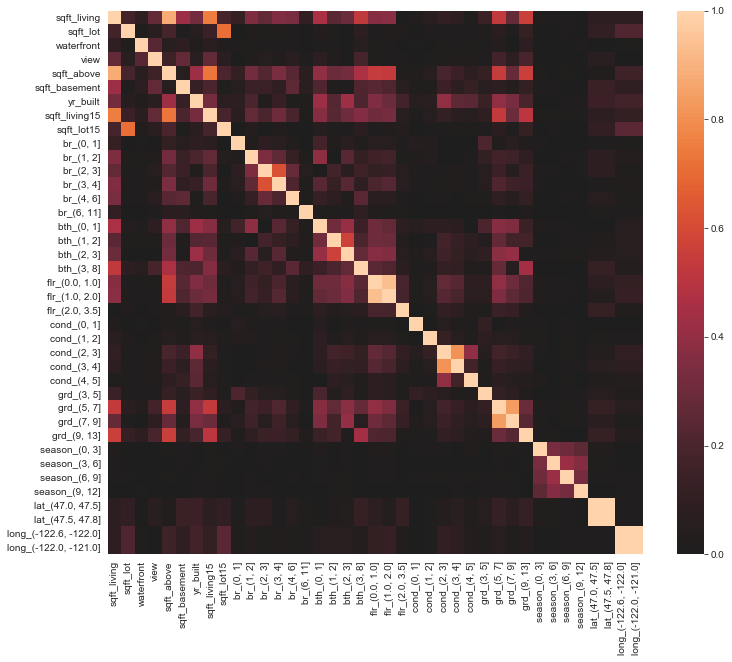

In [191]:
# create a heatmap to visualy inspect correlation
plt.figure(figsize=(12,10))
sns.heatmap(abs(df_dv.corr()), center=.0, xticklabels=df_dv.columns.values, yticklabels=df_dv.columns.values);

**Observations:**
* 

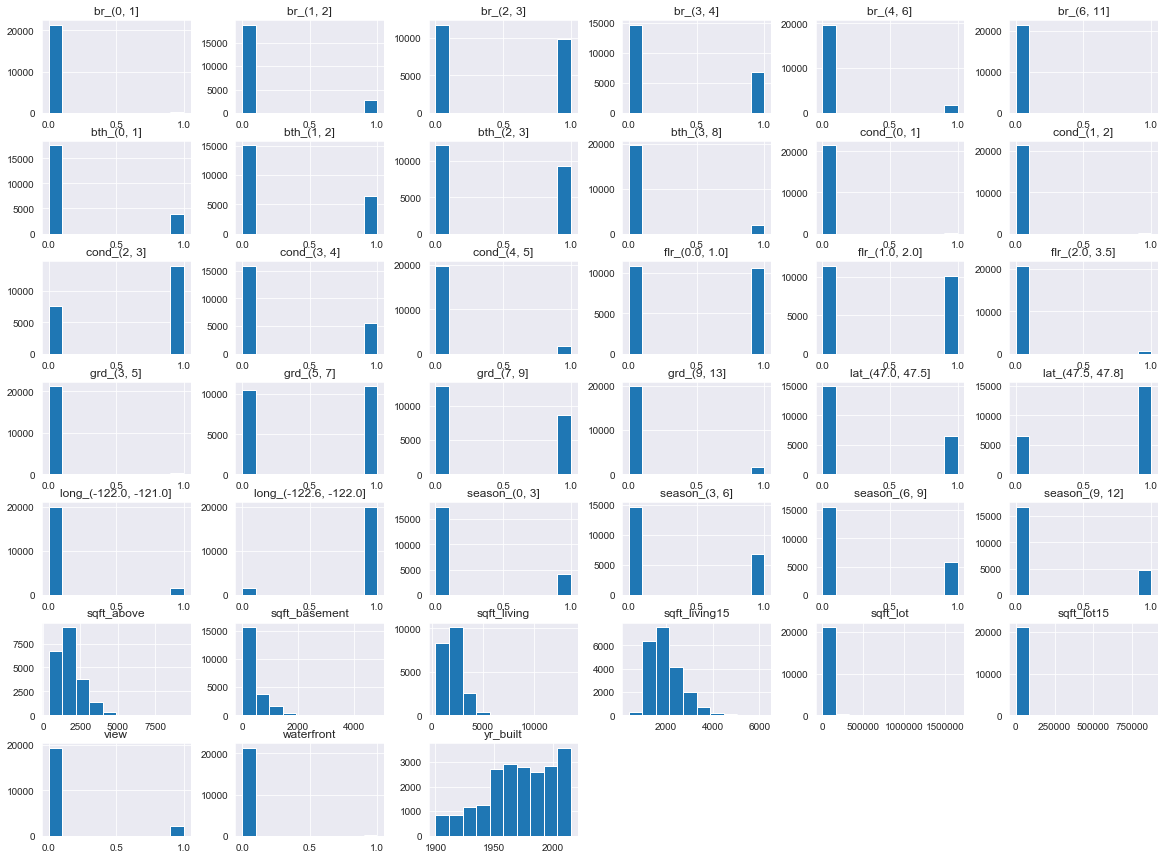

In [252]:
df_dv.hist(figsize=(20,15));

In [195]:
abs(df2.iloc[:,1:].corr())>.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


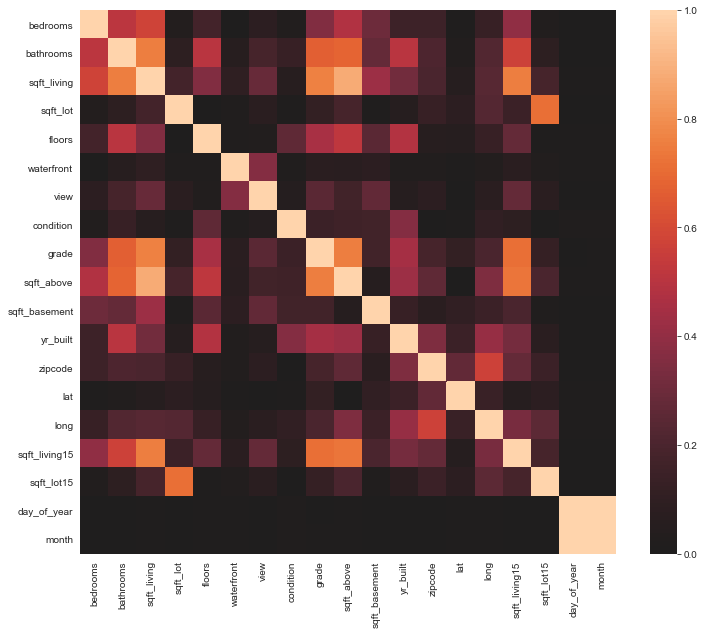

In [196]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df2.iloc[:,1:].corr()), center=.0);

**Observations** 
* 

In [229]:
df_dv2 = df_dv.rename(columns={'br_(0, 1]':'br1',
       'br_(1, 2]':'br2', 'br_(2, 3]':'br3', 'br_(3, 4]':'br4', 'br_(4, 6]':'br5', 'br_(6, 11]':'br6',
       'bth_(0, 1]':'bth1', 'bth_(1, 2]':'bth2', 'bth_(2, 3]':'bth3', 'bth_(3, 8]':'bth4',
       'flr_(0.0, 1.0]':'flr1', 'flr_(1.0, 2.0]':'flr2', 'flr_(2.0, 3.5]':'flr3', 'cond_(0, 1]':'cond1',
       'cond_(1, 2]':'cond2', 'cond_(2, 3]':'cond3', 'cond_(3, 4]':'cond4', 'cond_(4, 5]':'cond5',
       'grd_(3, 5]':'grd1', 'grd_(5, 7]':'grd2', 'grd_(7, 9]':'grd3', 'grd_(9, 13]':'grd4',
       'season_(0, 3]':'season1', 'season_(3, 6]':'season2', 'season_(6, 9]':'season3', 'season_(9, 12]':'season4',
       'lat_(47.0, 47.5]':'lat0', 'lat_(47.5, 47.8]':'lat1', 'long_(-122.6, -122.0]':'long0',
       'long_(-122.0, -121.0]':'long1'})

In [230]:
df_dv2 = pd.concat([df_dv2, df3['price']], axis=1) 
df_dv2.head()

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,br1,br2,br3,br4,br5,br6,bth1,bth2,bth3,bth4,flr1,flr2,flr3,cond1,cond2,cond3,cond4,cond5,grd1,grd2,grd3,grd4,season1,season2,season3,season4,lat0,lat1,long0,long1,price
0,1180,5650,0.0,0.0,1180,0.0,1955,1340,5650,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,221900.0
1,2570,7242,0.0,0.0,2170,400.0,1951,1690,7639,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,538000.0
2,770,10000,0.0,0.0,770,0.0,1933,2720,8062,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,180000.0
3,1960,5000,0.0,0.0,1050,910.0,1965,1360,5000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,604000.0
4,1680,8080,0.0,0.0,1680,0.0,1987,1800,7503,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,510000.0


In [261]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df_dv2.drop(['price','sqft_above','sqft_living15','grd1','grd2','grd3','grd4', 'br6'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()

model.summary()

# fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:44:06   Log-Likelihood:            -2.9425e+05
No. Observations:               21534   AIC:                         5.886e+05
Df Residuals:                   21507   BIC:                         5.888e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.181e+05   4.51e+04     18.135      0.000     7.3e+05    9.07e+05
sqft_living     292.6118      2.800    104.486      0.000     287.123     298.101
sqft_lot          0.1346      0.050      2.718      0.007       0.038       0.232
waterfront     6.044e+05   1.69e+04     35.732      0.000    5.71e+05    6.38e+05
view           1.404e+05   5229.640     26.845      0.000     1.3e+05    1.51e+05
sqft_basement   -77.5315      4.415    -17.559      0.000     -86.186     -68.877
yr_built      -1418.4993     68.848    -20.603      0.000   -1553.447   -1283.552
sqft_lot15       -0.2704      0.076     -3.551      0.000      -0.420      -0.121
br1            2.626e+05   3.13e+04      8.397      0.000    2.01e+05    3.24e+05
br2            2.546e+05   2.76e+04      9.224      0.000    2.01e+05    3.09e+05
br3            2.196e+05   2.72e+04      8.070      0.000    1.66e+05    2.73e+05
br4            1.686e+05    2.7e+04      6.235      0.000    1.16e+05    2.22e+05
br5             1.28e+05   2.72e+04      4.706      0.000    7.47e+04    1.81e+05
bth1           1.762e+05   1.02e+04     17.207      0.000    1.56e+05    1.96e+05
bth2           1.707e+05   1.11e+04     15.404      0.000    1.49e+05    1.92e+05
bth3           1.726e+05   1.24e+04     13.905      0.000    1.48e+05    1.97e+05
bth4           2.986e+05   1.38e+04     21.596      0.000    2.71e+05    3.26e+05
flr1           2.481e+05   1.52e+04     16.291      0.000    2.18e+05    2.78e+05
flr2           2.423e+05   1.49e+04     16.227      0.000    2.13e+05    2.72e+05
flr3           3.278e+05   1.65e+04     19.822      0.000    2.95e+05     3.6e+05
cond1          8.987e+04   3.27e+04      2.744      0.006    2.57e+04    1.54e+05
cond2           1.42e+05   1.75e+04      8.130      0.000    1.08e+05    1.76e+05
cond3           1.64e+05   1.29e+04     12.740      0.000    1.39e+05    1.89e+05
cond4          1.936e+05   1.23e+04     15.723      0.000    1.69e+05    2.18e+05
cond5          2.286e+05   1.23e+04     18.605      0.000    2.05e+05    2.53e+05
season1        2.141e+05   1.16e+04     18.426      0.000    1.91e+05    2.37e+05
season2        2.147e+05   1.15e+04     18.668      0.000    1.92e+05    2.37e+05
season3        1.954e+05   1.15e+04     16.922      0.000    1.73e+05    2.18e+05
season4         1.94e+05   1.16e+04     16.794      0.000    1.71e+05    2.17e+05
lat0           2.961e+05    2.3e+04     12.898      0.000    2.51e+05    3.41e+05
lat1           5.221e+05   2.23e+04     23.438      0.000    4.78e+05    5.66e+05
long0          4.554e+05   2.24e+04     20.360      0.000    4.12e+05    4.99e+05
long1          3.627e+05   2.31e+04     15.680      0.000    3.17e+05    4.08e+05
==============================================================================
Omnibus:                    16352.458   Durbin-Watso

In [254]:
x_cols = df_dv2.drop(['price', 'grd1','grd2','grd3','grd4'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1656.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:11:42   Log-Likelihood:            -2.9404e+05
No. Observations:               21534   AIC:                         5.881e+05
Df Residuals:                   21505   BIC:                         5.884e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.948e+05   4.21e+04     21.261      0.000    8.12e+05    9.77e+05
sqft_living     139.9550     21.729      6.441      0.000      97.365     182.545
sqft_lot          0.1738      0.049      3.538      0.000       0.077       0.270
waterfront     6.083e+05   1.68e+04     36.311      0.000    5.75e+05    6.41e+05
view           1.233e+05   5260.038     23.436      0.000    1.13e+05    1.34e+05
sqft_above      114.3212     21.788      5.247      0.000      71.615     157.027
sqft_basement    54.4362     21.758      2.502      0.012      11.789      97.084
yr_built      -1546.8860     68.469    -22.593      0.000   -1681.090   -1412.682
sqft_living15    66.2869      3.380     19.610      0.000      59.661      72.912
sqft_lot15       -0.3658      0.076     -4.840      0.000      -0.514      -0.218
br1            2.239e+05   1.53e+04     14.675      0.000    1.94e+05    2.54e+05
br2            2.255e+05   9758.587     23.104      0.000    2.06e+05    2.45e+05
br3             1.91e+05   9219.926     20.715      0.000    1.73e+05    2.09e+05
br4            1.383e+05   9086.783     15.225      0.000    1.21e+05    1.56e+05
br5            1.054e+05   9620.012     10.952      0.000    8.65e+04    1.24e+05
br6            1.081e+04   2.35e+04      0.461      0.645   -3.52e+04    5.68e+04
bth1           1.968e+05   9510.717     20.689      0.000    1.78e+05    2.15e+05
bth2           1.915e+05   1.03e+04     18.514      0.000    1.71e+05    2.12e+05
bth3           1.866e+05   1.17e+04     16.016      0.000    1.64e+05    2.09e+05
bth4             3.2e+05   1.31e+04     24.344      0.000    2.94e+05    3.46e+05
flr1           2.626e+05   1.42e+04     18.476      0.000    2.35e+05     2.9e+05
flr2           2.632e+05   1.39e+04     18.911      0.000    2.36e+05     2.9e+05
flr3           3.691e+05   1.56e+04     23.583      0.000    3.38e+05       4e+05
cond1           8.74e+04   3.23e+04      2.709      0.007    2.42e+04    1.51e+05
cond2          1.615e+05    1.7e+04      9.474      0.000    1.28e+05    1.95e+05
cond3          1.831e+05   1.24e+04     14.774      0.000    1.59e+05    2.07e+05
cond4           2.12e+05   1.19e+04     17.891      0.000    1.89e+05    2.35e+05
cond5          2.508e+05   1.19e+04     21.146      0.000    2.28e+05    2.74e+05
season1        2.337e+05   1.09e+04     21.479      0.000    2.12e+05    2.55e+05
season2        2.332e+05   1.08e+04     21.682      0.000    2.12e+05    2.54e+05
season3        2.143e+05   1.08e+04     19.848      0.000    1.93e+05    2.36e+05
season4        2.137e+05   1.08e+04     19.760      0.000    1.92e+05    2.35e+05
lat0           3.379e+05   2.15e+04     15.747      0.000    2.96e+05     3.8e+05
lat1           5.569e+05   2.07e+04     26.840      0.000    5.16e+05    5.98e+05
long0          4.941e+05   2.09e+04     23.672   

In [237]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df2.drop(['price'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df2).fit()

model.summary()

# fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2617.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:03:13   Log-Likelihood:            -2.9353e+05
No. Observations:               21534   AIC:                         5.871e+05
Df Residuals:                   21514   BIC:                         5.873e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.925e+06   2.93e+06      2.705      0.007    2.18e+06    1.37e+07
bedrooms      -3.646e+04   1902.460    -19.163      0.000   -4.02e+04   -3.27e+04
bathrooms      4.364e+04   3244.289     13.451      0.000    3.73e+04       5e+04
sqft_living      83.4633     21.241      3.929      0.000      41.829     125.098
sqft_lot          0.1190      0.048      2.481      0.013       0.025       0.213
floors         8622.3118   3601.715      2.394      0.017    1562.684    1.57e+04
waterfront     5.152e+05    1.7e+04     30.280      0.000    4.82e+05    5.49e+05
view           5.854e+04   2109.342     27.755      0.000    5.44e+04    6.27e+04
condition      2.465e+04   2321.881     10.615      0.000    2.01e+04    2.92e+04
grade            9.7e+04   2162.435     44.855      0.000    9.28e+04    1.01e+05
sqft_above       97.6364     21.252      4.594      0.000      55.981     139.291
sqft_basement    66.1248     21.234      3.114      0.002      24.505     107.744
yr_built      -2756.5141     69.040    -39.926      0.000   -2891.837   -2621.191
zipcode        -594.0788     33.038    -17.982      0.000    -658.836    -529.322
lat            5.995e+05   1.07e+04     55.775      0.000    5.78e+05    6.21e+05
long          -2.175e+05   1.32e+04    -16.521      0.000   -2.43e+05   -1.92e+05
sqft_living15    20.0119      3.452      5.797      0.000      13.246      26.778
sqft_lot15       -0.3740      0.073     -5.096      0.000      -0.518      -0.230
day_of_year    -486.4801    158.912     -3.061      0.002    -797.959    -175.001
month          1.173e+04   4833.115      2.426      0.015    2253.058    2.12e+04
==============================================================================
Omnibus:                    18228.740   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1812654.649
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      47.384   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
df2_drops = df2.drop(['bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'month'], axis=1)

In [239]:
x_cols = df2_drops.drop(['price'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df2_drops).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2980.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:16:02   Log-Likelihood:            -2.9481e+05
No. Observations:               21534   AIC:                         5.896e+05
Df Residuals:                   21519   BIC:                         5.898e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.532e+06   3.06e+06      2.137      0.033     5.4e+05    1.25e+07
bedrooms      -4.405e+04   1965.939    -22.405      0.000   -4.79e+04   -4.02e+04
sqft_living     304.3436      2.580    117.974      0.000     299.287     309.400
sqft_lot          0.1146      0.051      2.256      0.024       0.015       0.214
floors          3.61e+04   3618.874      9.976      0.000     2.9e+04    4.32e+04
waterfront     4.885e+05    1.8e+04     27.084      0.000    4.53e+05    5.24e+05
view           7.504e+04   2187.915     34.299      0.000    7.08e+04    7.93e+04
condition      2.677e+04   2458.397     10.891      0.000     2.2e+04    3.16e+04
sqft_basement   -62.1747      4.453    -13.963      0.000     -70.903     -53.447
yr_built      -1617.1785     67.246    -24.049      0.000   -1748.986   -1485.371
zipcode        -731.2002     34.822    -20.998      0.000    -799.454    -662.946
lat            7.044e+05   1.12e+04     62.975      0.000    6.82e+05    7.26e+05
long          -2.847e+05   1.37e+04    -20.787      0.000   -3.12e+05   -2.58e+05
sqft_lot15       -0.4302      0.078     -5.533      0.000      -0.583      -0.278
day_of_year    -105.3319     15.384     -6.847      0.000    -135.486     -75.178
==============================================================================
Omnibus:                    15354.041   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           853472.258
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      33.311   Cond. No.                     2.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sns.lmplot(x="lat", y="price", hue='waterfront', data=df3);

In [255]:
from sklearn.model_selection import train_test_split

data = df_dv2
y = data[["price"]]
X = data.drop(["price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [256]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17227 4307 17227 4307


In [257]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [258]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    3.852463e+10
dtype: float64
Test Mean Squarred Error: price    4.671017e+10
dtype: float64
